## The purpose of this project is to make a decision to go play outside based on the weather

## tool used for data preprocessing: pandas

## tool used for visualization : matplotlib ( export_graphviz method used to visualize the Decision Tree)

## model used for prediction: Decision Tree Classifier from sklearn the gini criterion was used


In [1]:
import pandas as pd

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/'My Drive'/'Colab Notebooks'
%ls

/content/drive/My Drive/Colab Notebooks
 abalone.data                     'ML Challenge 1.ipynb'
 bpRNA_CRW_2852.ct                'ML Challenge II .ipynb'
 bpRNA_CRW_2852_predicted.ct      'ML Challenge IV .ipynb'
 bpRNA_CRW_2852.st                 model_lr0.001.h5
 breast-cancer.data                model_lr0.01.h5
 car.data                          model_lr0.1.h5
 car.dot                          'Object Detection Homework'/
 car_model.dot                     Perceptron_practise.ipynb
 car.png                          'Practise 1.ipynb'
'Copied Homeworks'/               'Practise 2.ipynb'
 DeepLearningImageTutorial.ipynb   Protein_Project.ipynb
'ecoli .data'                      SPECT_model.h5
 exam.xlsx                         SPECT.test
 homework01.ipynb                  SPECT.train
 homework02.ipynb                  transfusion.data
 homework03.ipynb                  tree.dot
 homework05.ipynb                  tree.png
 homework06.ipynb                  Untitled0.ipynb
 homework07

In [10]:
import pandas as pd
ecoli_df = pd.read_csv('car.data', header=None, delim_whitespace=True)
#ecoli_df.columns = ['sequence','mcg','gvh','lip','chg','aac','alm1','alm2','Label']

In [9]:
weather_df = pd.read_csv('weather.data')

FileNotFoundError: ignored

In [ ]:
weather_df

,Outlook,Temp,Humidity,Windy,Play (Outcome)
0,Sunny,hot,normal,F,Y
1,Rainy,cool,normal,F,Y
2,Rainy,mild,high,F,Y
3,Rainy,mild,normal,F,Y
4,Sunny,cool,normal,F,Y
5,Sunny,hot,high,F,N
6,Sunny,mild,high,F,N
7,Rainy,cool,normal,T,N
8,Rainy,mild,high,T,N
9,Sunny,hot,high,T,N


In [ ]:
weather_df_numeric = weather_df.copy()
cat_vars = ['Outlook','Temp','Humidity','Windy']
weather_label = weather_df['Play (Outcome)']
weather_df_numeric['Outlook'] = pd.Categorical(weather_df_numeric['Outlook']).codes
weather_df_numeric['Temp'] = pd.Categorical(weather_df_numeric['Temp']).codes
weather_df_numeric['Humidity'] = pd.Categorical(weather_df_numeric['Humidity']).codes
weather_df_numeric['Windy'] = pd.Categorical(weather_df_numeric['Windy']).codes
weather_df_numeric['Play (Outcome)'] = pd.Categorical(weather_df_numeric['Play (Outcome)']).codes
weather_df_numeric

,Outlook,Temp,Humidity,Windy,Play (Outcome)
0,1,1,1,0,1
1,0,0,1,0,1
2,0,2,0,0,1
3,0,2,1,0,1
4,1,0,1,0,1
5,1,1,0,0,0
6,1,2,0,0,0
7,0,0,1,1,0
8,0,2,0,1,0
9,1,1,0,1,0


In [ ]:
weather_label

0     Y
1     Y
2     Y
3     Y
4     Y
5     N
6     N
7     N
8     N
9     N
10    Y
Name: Play (Outcome), dtype: object

In [ ]:
print("Pandas: " ,weather_df_numeric[['Play (Outcome)']])
labels = weather_df_numeric[['Play (Outcome)']].to_numpy()
labels = labels.flatten()
print("Numpy:",labels)

Pandas:      Play (Outcome)
0                1
1                1
2                1
3                1
4                1
5                0
6                0
7                0
8                0
9                0
10               1
Numpy: [1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
import numpy as np 
weather_class = np.unique(weather_label.to_numpy())
print(weather_class)

['N' 'Y']


In [ ]:
features = weather_df_numeric.drop(['Play (Outcome)'],axis=1)
features_np = features.to_numpy()
print(features_np)

[[1 1 1 0]
 [0 0 1 0]
 [0 2 0 0]
 [0 2 1 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 2 0 0]
 [0 0 1 1]
 [0 2 0 1]
 [1 1 0 1]
 [1 2 1 1]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini',random_state = 42)
tree_clf.fit(features_np,labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

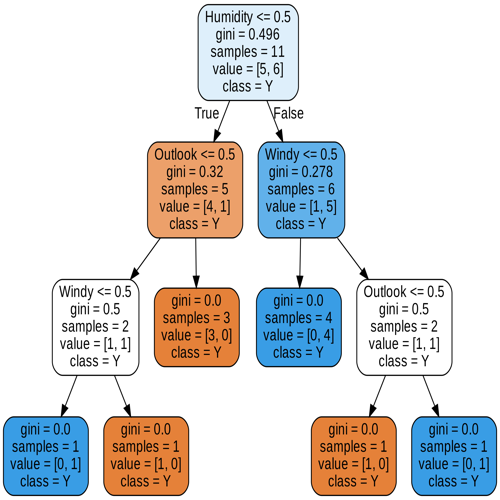

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
     tree_clf,

    out_file = "tree.dot",

    feature_names = list(features.columns.values),

    class_names =  weather_label,

    rounded = True,proportion = False,

    filled = True
)

from subprocess import call

call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])

from PIL import Image

im = Image.open('tree.png')
newsize = (500,500)
im1 = im.resize(newsize)
im1